Visualisations

In [28]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl
import pandas as pd


In [29]:
import pandas as pd

def process_themes(input_file, output_file):
    """
    Processes the themes from the input CSV file to identify the top 20 most popular themes 
    across all years and calculates their counts for each decade.

    Parameters:
        input_file (str): Path to the input CSV file with columns Year, Theme, Count.
        output_file (str): Path to the output CSV file to save the result.
    """
    # Read the input file
    data = pd.read_csv(input_file)
    
    # Convert 'Year' to 'Decade'
    data['Decade'] = (data['Year'] // 10 * 10).astype(str) + 's'
    
    # Get the top 20 themes across all years
    top_themes = (
        data.groupby('Theme')['Count']
        .sum()
        .sort_values(ascending=False)
        .head(20)
        .index
    )
    
    # Filter data to include only the top themes
    filtered_data = data[data['Theme'].isin(top_themes)]
    
    # Pivot the data to create a decade-by-theme table
    pivot_table = (
        filtered_data
        .groupby(['Decade', 'Theme'])['Count']
        .sum()
        .unstack(fill_value=0)
    )
    
    # Save the pivot table to the output CSV file
    pivot_table.to_csv(output_file)
    print(f"Output saved to {output_file}")

# Example usage
process_themes('all_art.csv', 'all_art_popular.csv')


Output saved to all_art_popular.csv


In [30]:
gdp_data = pd.read_csv('gdp_decade.csv')
GDP_by_decade_list = [f"${row['Rounded GDP (billions)']:.0f} bn in {row['Decade']}" 
                      for _, row in gdp_data.iterrows()]
GDP_by_decade = list(GDP_by_decade_list[:10])

print(GDP_by_decade)


art_data = pd.read_csv('all_art_popular.csv')
art_themes_list = list(art_data.columns[1:])

print(art_themes_list)

['$1191 bn in 1920s', '$1089 bn in 1930s', '$2140 bn in 1940s', '$2970 bn in 1950s', '$4369 bn in 1960s', '$6223 bn in 1970s', '$8374 bn in 1980s', '$11439 bn in 1990s', '$15544 bn in 2000s', '$18582 bn in 2010s']
['Animals', 'Architecture', 'Boats and boating', 'Botanical study', 'Children', 'Cityscapes', 'Clothing and dress', 'Domestic', 'Dress accessories', 'Figure female', 'Figure group', 'Figure male', 'Landscapes', 'Men', 'Nudity', 'Occupations', 'Portraits', 'Religion', 'Trees', 'Women']


In [31]:
def create_theme_array(csv_file):
    # Read the CSV file
    data = pd.read_csv(csv_file)
    
    # Extract themes (columns excluding "Decade")
    themes = list(data.columns[1:])
    
    # Extract counts as a 2D NumPy array
    theme_counts = data.iloc[2:, 1:].values  
    
    return themes, theme_counts

# Usage
csv_file = "all_art_popular.csv"  # Replace with your file path
themes, theme_array = create_theme_array(csv_file)

# Print the themes list
print("Themes:", themes)

# Print the NumPy array
print("Theme Counts Array:")
print(theme_array)

Themes: ['Animals', 'Architecture', 'Boats and boating', 'Botanical study', 'Children', 'Cityscapes', 'Clothing and dress', 'Domestic', 'Dress accessories', 'Figure female', 'Figure group', 'Figure male', 'Landscapes', 'Men', 'Nudity', 'Occupations', 'Portraits', 'Religion', 'Trees', 'Women']
Theme Counts Array:
[[221 308  46 269  32 135  68  82  59 100 200  68 305 157  80 138 169  76
   65  66]
 [ 84 191  35 154  25  65  48  62  35  81 141  53 251  81  46  99 107  41
   41  60]
 [ 48  92  18  17   2  30  28  46  14  29  74  82 103  32   7  85  25  14
   11  16]
 [  5   8   0   0   2   0   4   5   2   4   6   4   9   2   1   2   4   3
    2   2]
 [  9  22   4   0   2   9   3  13   3   2  12   8  24   9   0   8   8   1
    5   3]
 [ 13   9   3   0   1   2   3   2   3   1   6   1   5   3   0   6   6   1
    3   4]
 [ 17   4   1   0  12   0   8   1   8   1   4   4   4  22   1   2  32   1
    0  15]
 [ 14  12   3   0   7   0   8   2   8   7   5   2   4   2   1   3   1   1
    0   3]
 [  0 

the array above is the absolute number of art pieces made in every art theme each decade from 1920s to 2010s. while the array below is the percentage of each art theme made each year out of the total number of the top 20 art themes each year.

 **Is it better to do the ratio out of ALL the art pieces made in each year, instead of focusing on the total number of the top 20 themes??**

In [32]:
# Step 1: Calculate the sum of each row (total paintings in each decade)
decade_totals = np.sum(theme_array, axis=1)

# Step 2: Normalize the array to percentage values
percentage_array = (theme_array.T / decade_totals).T * 100  # Transpose to divide by row totals
percentage_array_rounded = np.round(percentage_array, 0)

# Now, percentage_array contains the percentage of paintings for each theme per decade
print(percentage_array_rounded)

[[ 8. 12.  2. 10.  1.  5.  3.  3.  2.  4.  8.  3. 12.  6.  3.  5.  6.  3.
   2.  2.]
 [ 5. 11.  2.  9.  1.  4.  3.  4.  2.  5.  8.  3. 15.  5.  3.  6.  6.  2.
   2.  4.]
 [ 6. 12.  2.  2.  0.  4.  4.  6.  2.  4. 10. 11. 13.  4.  1. 11.  3.  2.
   1.  2.]
 [ 8. 12.  0.  0.  3.  0.  6.  8.  3.  6.  9.  6. 14.  3.  2.  3.  6.  5.
   3.  3.]
 [ 6. 15.  3.  0.  1.  6.  2.  9.  2.  1.  8.  6. 17.  6.  0.  6.  6.  1.
   3.  2.]
 [18. 12.  4.  0.  1.  3.  4.  3.  4.  1.  8.  1.  7.  4.  0.  8.  8.  1.
   4.  6.]
 [12.  3.  1.  0.  9.  0.  6.  1.  6.  1.  3.  3.  3. 16.  1.  1. 23.  1.
   0. 11.]
 [17. 14.  4.  0.  8.  0. 10.  2. 10.  8.  6.  2.  5.  2.  1.  4.  1.  1.
   0.  4.]
 [ 0. 13.  0.  0.  7.  0.  7.  0.  7.  0. 13.  7.  7. 20.  0.  0. 20.  0.
   0.  0.]
 [ 0.  0.  0.  0. 33.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 33. 33.
   0.  0.]]


**THINGS TO CHANGE:** make the writing on yellow squares black, check that its colorblind accessible, check that its ok to do percentage of paintings done in eacvh year instead of actual amount, switch top two rows so that it is in order of increasing GDP (?)

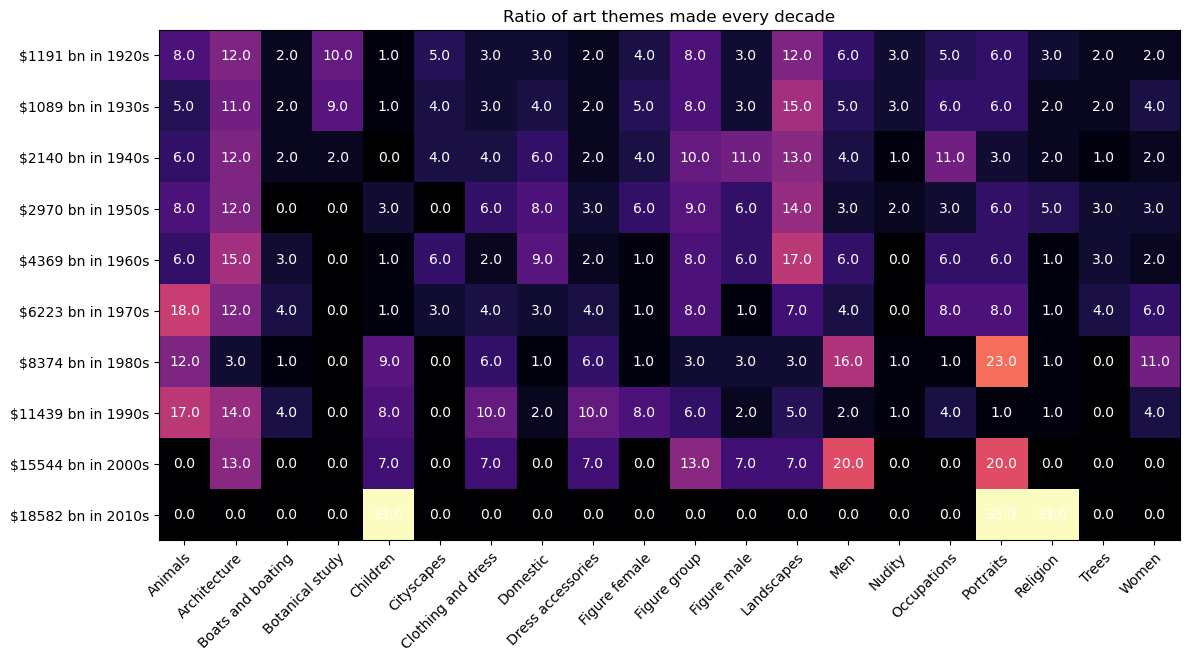

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))
cmap = 'magma'  # Example colormap: You can try others like 'viridis', 'inferno', etc.
im = ax.imshow(percentage_array_rounded, cmap=cmap)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(art_themes_list)), labels= art_themes_list,
              rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(GDP_by_decade)), labels= GDP_by_decade)

# Loop over data dimensions and create text annotations.
for i in range(len(GDP_by_decade)):
    for j in range(len(art_themes_list)):
        text = ax.text(j, i, percentage_array_rounded[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Ratio of art themes made every decade")
fig.tight_layout()
plt.show()

heatmap below has black writing on cells with light background colour to ensure visibility of the writing.

/tmp/ipykernel_337/2891778553.py:16: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



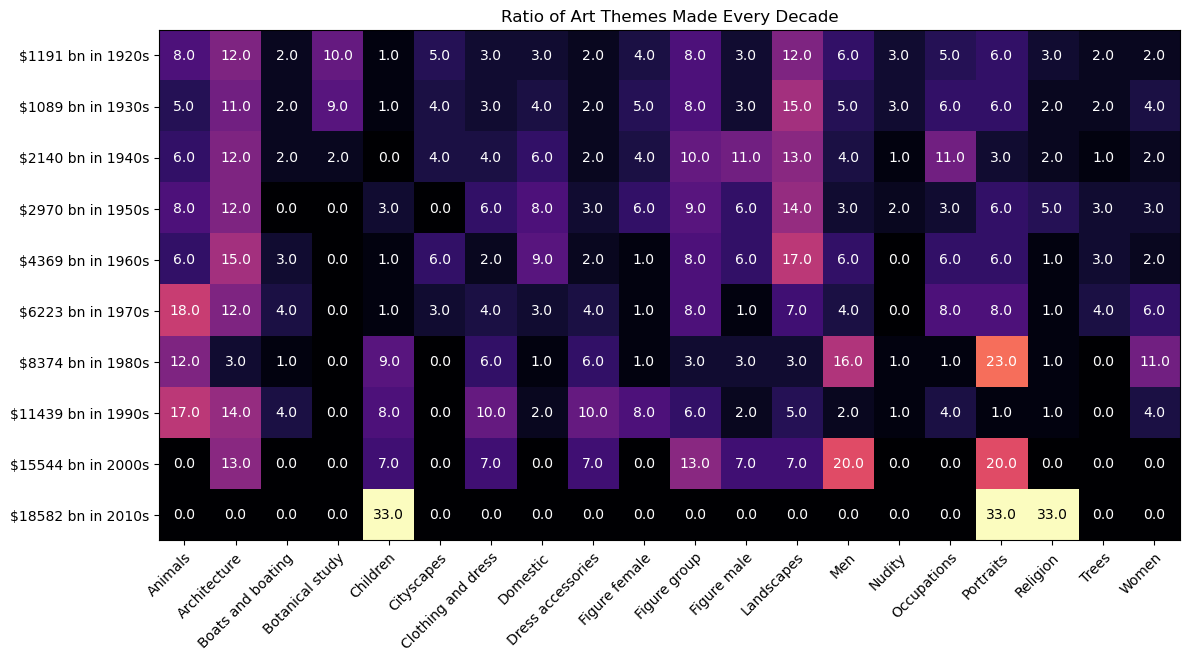

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(12, 8))
cmap = 'magma'  # Example colormap
im = ax.imshow(percentage_array_rounded, cmap=cmap)

# Show all ticks and label them
ax.set_xticks(range(len(art_themes_list)), labels=art_themes_list, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(GDP_by_decade)), labels=GDP_by_decade)

# Normalize the data to colormap range
norm = mcolors.Normalize(vmin=np.min(percentage_array_rounded), vmax=np.max(percentage_array_rounded))
colormap = cm.get_cmap(cmap)

# Loop over data dimensions and create text annotations
for i in range(len(GDP_by_decade)):
    for j in range(len(art_themes_list)):
        value = percentage_array_rounded[i, j]
        color = colormap(norm(value))  # Get RGBA color from colormap
        brightness = (0.299 * color[0] + 0.587 * color[1] + 0.114 * color[2])  # Compute perceived brightness
        
        text_color = "black" if brightness > 0.6 else "white"  # Switch text color if background is bright
        
        ax.text(j, i, value, ha="center", va="center", color=text_color)

ax.set_title("Ratio of Art Themes Made Every Decade")
fig.tight_layout()
plt.show()


In [35]:
# Convert your array and list into the desired dictionary structure
results = {GDP_by_decade[i]: percentage_array_rounded[i].tolist() for i in range(len(GDP_by_decade))}

# Print the results to verify
print(results)

{'$1191 bn in 1920s': [8.0, 12.0, 2.0, 10.0, 1.0, 5.0, 3.0, 3.0, 2.0, 4.0, 8.0, 3.0, 12.0, 6.0, 3.0, 5.0, 6.0, 3.0, 2.0, 2.0], '$1089 bn in 1930s': [5.0, 11.0, 2.0, 9.0, 1.0, 4.0, 3.0, 4.0, 2.0, 5.0, 8.0, 3.0, 15.0, 5.0, 3.0, 6.0, 6.0, 2.0, 2.0, 4.0], '$2140 bn in 1940s': [6.0, 12.0, 2.0, 2.0, 0.0, 4.0, 4.0, 6.0, 2.0, 4.0, 10.0, 11.0, 13.0, 4.0, 1.0, 11.0, 3.0, 2.0, 1.0, 2.0], '$2970 bn in 1950s': [8.0, 12.0, 0.0, 0.0, 3.0, 0.0, 6.0, 8.0, 3.0, 6.0, 9.0, 6.0, 14.0, 3.0, 2.0, 3.0, 6.0, 5.0, 3.0, 3.0], '$4369 bn in 1960s': [6.0, 15.0, 3.0, 0.0, 1.0, 6.0, 2.0, 9.0, 2.0, 1.0, 8.0, 6.0, 17.0, 6.0, 0.0, 6.0, 6.0, 1.0, 3.0, 2.0], '$6223 bn in 1970s': [18.0, 12.0, 4.0, 0.0, 1.0, 3.0, 4.0, 3.0, 4.0, 1.0, 8.0, 1.0, 7.0, 4.0, 0.0, 8.0, 8.0, 1.0, 4.0, 6.0], '$8374 bn in 1980s': [12.0, 3.0, 1.0, 0.0, 9.0, 0.0, 6.0, 1.0, 6.0, 1.0, 3.0, 3.0, 3.0, 16.0, 1.0, 1.0, 23.0, 1.0, 0.0, 11.0], '$11439 bn in 1990s': [17.0, 14.0, 4.0, 0.0, 8.0, 0.0, 10.0, 2.0, 10.0, 8.0, 6.0, 2.0, 5.0, 2.0, 1.0, 4.0, 1.0, 1.0, 0

pip install streamlit matplotlib in terminal 

below i made a variable that lists GDP in ascending order, so the first value of GDP (the lowest) actually represents 1930s while the second represents 1920s. the rest are also in ascending order of decades, e.g. the third item in the list is 1940s and the fourth is 1950s.

In [36]:
file_path = "gdp_decade.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Extract the GDP values and sort them in ascending order
GDP_list = sorted(data['Rounded GDP (billions)'].tolist())

# Display the result
print(GDP_list)


[1089.0, 1191.0, 2140.0, 2970.0, 4369.0, 6223.0, 8374.0, 11439.0, 15544.0, 18582.0, 21617.0]


In [37]:

# Assuming theme_array is already defined
array_ordered = theme_array.copy()  # Create a copy to avoid modifying the original
array_ordered[[0, 1]] = array_ordered[[1, 0]]  # Swap the first two rows

print(array_ordered)


[[ 84 191  35 154  25  65  48  62  35  81 141  53 251  81  46  99 107  41
   41  60]
 [221 308  46 269  32 135  68  82  59 100 200  68 305 157  80 138 169  76
   65  66]
 [ 48  92  18  17   2  30  28  46  14  29  74  82 103  32   7  85  25  14
   11  16]
 [  5   8   0   0   2   0   4   5   2   4   6   4   9   2   1   2   4   3
    2   2]
 [  9  22   4   0   2   9   3  13   3   2  12   8  24   9   0   8   8   1
    5   3]
 [ 13   9   3   0   1   2   3   2   3   1   6   1   5   3   0   6   6   1
    3   4]
 [ 17   4   1   0  12   0   8   1   8   1   4   4   4  22   1   2  32   1
    0  15]
 [ 14  12   3   0   7   0   8   2   8   7   5   2   4   2   1   3   1   1
    0   3]
 [  0   2   0   0   1   0   1   0   1   0   2   1   1   3   0   0   3   0
    0   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   1   1
    0   0]]


Below is the first version of the graph

Changes made in graph below from graph above: changed background colours to make the lines stick out more (might be more colour blind accessible), changed the colour of some lines such as "dress accessories" because they were too light. added average effect as an option as just looking at all themes might be a bit confusing.

In [38]:
import numpy as np
import plotly.graph_objects as go
import colorsys

# Example data
art_themes = art_themes_list
GDP_by_decade = GDP_list
paintings_data = array_ordered

# Function to generate high-contrast colors
def generate_colors(n):
    colors = []
    for i in range(n):
        hue = (i * 137.5) % 360  # Spread colors around the HSL wheel
        rgb = colorsys.hls_to_rgb(hue / 360, 0.4, 1.0)  # Ensure mid-brightness
        hex_color = "#{:02x}{:02x}{:02x}".format(
            int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255)
        )
        colors.append(hex_color)
    return colors

# Generate a color list with good contrast
colors = generate_colors(len(art_themes))

# Calculate the average effect of GDP on paintings
average_paintings = np.mean(paintings_data, axis=1)

# Initialize figure
fig = go.Figure()

# Add traces for each art theme
for i, theme in enumerate(art_themes):
    fig.add_trace(
        go.Scatter(
            x=GDP_by_decade,
            y=paintings_data[:, i],
            name=theme,
            visible=(i == 0),
            line=dict(color=colors[i])
        )
    )

# Add a trace for the average effect (initially hidden)
fig.add_trace(
    go.Scatter(
        x=GDP_by_decade,
        y=average_paintings,
        name="Average Effect",
        visible=False,  # Initially hidden
        line=dict(color="black", width=3, dash="dashdot")  # Black dashed line
    )
)

# Create dropdown menu options
dropdown_options = [
    {
        "label": "All Themes",
        "method": "update",
        "args": [
            {"visible": [True] * len(art_themes) + [False]},  # Show all themes, hide average
            {"title": "Popularity of All Art Themes vs. GDP"}
        ]
    },
    {
        "label": "Average Effect",
        "method": "update",
        "args": [
            {"visible": [False] * len(art_themes) + [True]},  # Hide all themes, show average
            {"title": "Average Effect of GDP on Number of Paintings"}
        ]
    }
]

# Add individual theme options
dropdown_options.extend([
    {
        "label": theme,
        "method": "update",
        "args": [
            {"visible": [j == i for j in range(len(art_themes))] + [False]},  # Show only selected theme, hide average
            {"title": f"Popularity of {theme} vs. GDP"}
        ]
    }
    for i, theme in enumerate(art_themes)
])

# Apply layout fixes (White background, gray axis/grid lines)
fig.update_layout(
    paper_bgcolor="white",
    plot_bgcolor="white",
    xaxis=dict(
        showgrid=True,
        gridcolor="gray",
        zerolinecolor="black",
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor="gray",
        zerolinecolor="black"
    ),
    updatemenus=[
        {
            "buttons": dropdown_options,
            "direction": "down",
            "showactive": True,
            "x": 0.1,
            "y": 1.15
        }
    ],
    title="Popularity of Art Themes vs. GDP",
    xaxis_title="GDP in billions of $",
    yaxis_title="Number of Paintings"
)

# Display the figure
fig.show()
